You should implement at least the modules Linear (fully connected layer), ReLU , Tanh , Sequential
to combine several modules in basic sequential structure, and LossMSE to compute the MSE loss.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
def prepare_standardplot(title, xlabel):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
    fig.suptitle(title)
    ax1.set_ylabel('MSE')
    ax1.set_xlabel(xlabel)
    ax2.set_ylabel('accuracy [% correct]')
    ax2.set_xlabel(xlabel)
    return fig, ax1, ax2

def finalize_standardplot(fig, ax1, ax2):
    ax1handles, ax1labels = ax1.get_legend_handles_labels()
    if len(ax1labels) > 0:
        ax1.legend(ax1handles, ax1labels)
    ax2handles, ax2labels = ax2.get_legend_handles_labels()
    if len(ax2labels) > 0:
        ax2.legend(ax2handles, ax2labels)
    fig.tight_layout()
    plt.subplots_adjust(top=0.9)

def plot_history(history, title):
    fig, ax1, ax2 = prepare_standardplot(title, 'epoch')
    ax1.plot(history['tr_loss'], label = "training")
    ax1.plot(history['val_loss'], label = "validation")
    ax2.plot(history['tr_acc'], label = "training")
    ax2.plot(history['val_acc'], label = "validation")
    finalize_standardplot(fig, ax1, ax2)
    return fig


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
from sequential import Sequential
from linear import Linear
from activations import ReLU, Tanh
from losses import MSE
from utils import build_data

In [5]:
import warnings
warnings.filterwarnings("ignore", message="other is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.")

In [6]:
x_train, y_train = build_data(1000)
x_validation, y_validation = build_data(1000)

In [7]:
def build_model():
    model = Sequential(MSE(), input_size=2)
    model.add_layer(Linear(2, 25))
    model.add_layer(ReLU(25))
    model.add_layer(Linear(25, 25))
    model.add_layer(ReLU(25))
    model.add_layer(Linear(25, 25))
    model.add_layer(Tanh(25))
    model.add_layer(Linear(25, 2))
    return model

Model with 7 layers
	Input size : 2
	Fully connected layer of 25 hidden units
	ReLU activation layer of size 25
	Fully connected layer of 25 hidden units
	ReLU activation layer of size 25
	Fully connected layer of 25 hidden units
	Tanh activation layer of size 25
	2 fully connected output units
Loss at epoch 1 : 0.1768415072225034
Loss at epoch 2 : 0.14187315708181267
Loss at epoch 3 : 0.11367497093090788
Loss at epoch 4 : 0.10052391232550144
Loss at epoch 5 : 0.09066698156035273
Loss at epoch 6 : 0.08765306344465353
Loss at epoch 7 : 0.0861373464289054
Loss at epoch 8 : 0.0793261014186137
Loss at epoch 9 : 0.07763404348737185
Loss at epoch 10 : 0.07562092358979135
Loss at epoch 11 : 0.07461562127736761
Loss at epoch 12 : 0.07350839010888739
Loss at epoch 13 : 0.0752407301154426
Loss at epoch 14 : 0.0720249740491854
Loss at epoch 15 : 0.07200819862803928
Loss at epoch 16 : 0.07079697745415615
Loss at epoch 17 : 0.07002834272620384
Loss at epoch 18 : 0.07003276344148616
Loss at epoch 19

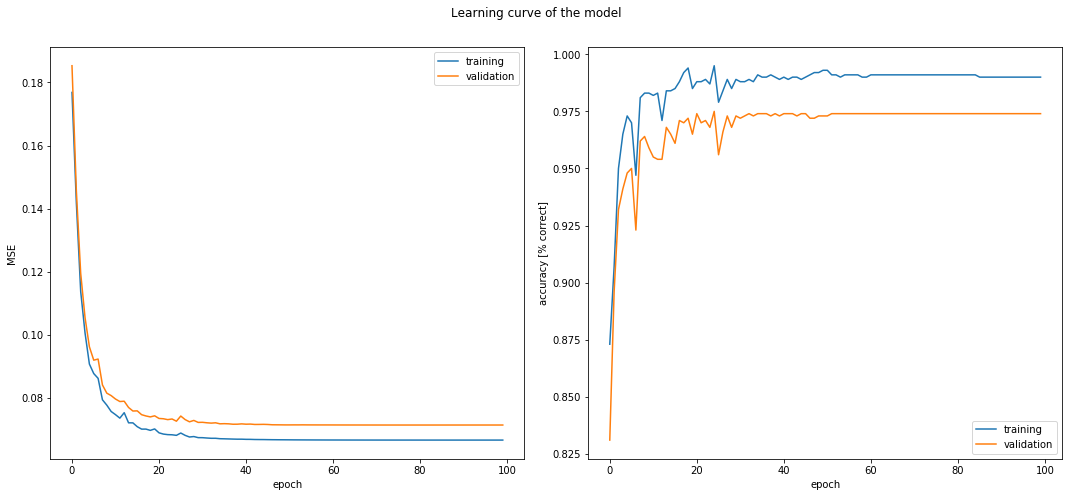

In [8]:
model = build_model()
model.summary()
history = model.fit(x_train, y_train, x_validation, y_validation, epochs=100, step_size=0.001, momentum=None, batch_size=1)
plot_history(history, 'Learning curve of the model');

In [9]:
preds = model.predict(x_validation)

In [10]:
def get_coords(x, indexes):
    xs = []
    ys = []
    for i in indexes:
        xs.append(x[i][0])
        ys.append(x[i][1])
    return xs, ys

In [11]:
x1, y1 = get_coords(x_validation, np.where(preds != y_validation)[0])
x2, y2 = get_coords(x_validation, np.where(preds == y_validation)[0])

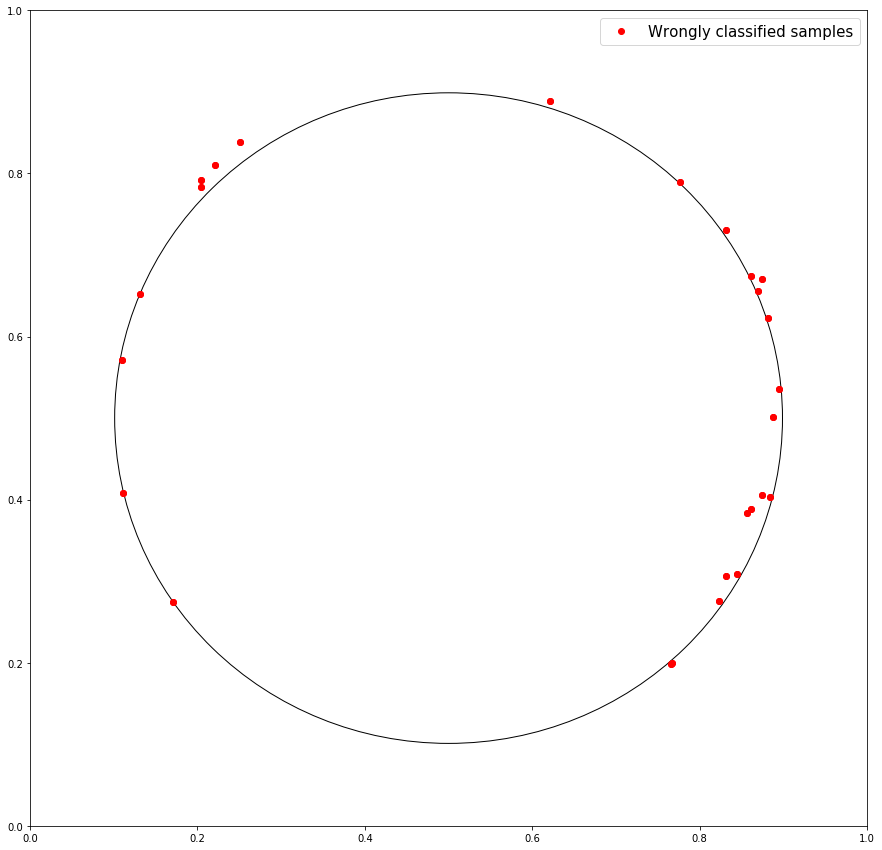

In [12]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.plot(x1, y1, 'ro', color='red', label='Wrongly classified samples')
# plt.plot(x2, y2, 'ro', color='grey', label='Well classified')
ax.add_artist(plt.Circle((0.5, 0.5), 1/math.sqrt(2*math.pi), fill=False, color='black'))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc='best', prop={'size': 15})

We see that the classifier makes mistakes on the boundary which is normal.